<a href="https://colab.research.google.com/github/nongquocdat/AI/blob/main/Nhan_Dien_Hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

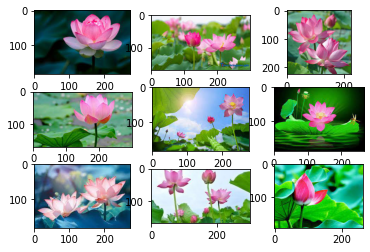

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/train/hoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'hoasen'+str(i+1)+'.jfif'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [5]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/train/hoa/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('hoahong'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoacuc'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoasen'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoamai'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoadao'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(42, 200, 200, 3) (42,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 5s 854ms/step - loss: 2834.2314 - accuracy: 0.1429
Epoch 2/50
2/2 [==============================] - 4s 1s/step - loss: 1848.6127 - accuracy: 0.2857
Epoch 3/50
2/2 [==============================] - 6s 1s/step - loss: 1242.7035 - accuracy: 0.2857
Epoch 4/50
2/2 [==============================] - 5s 857ms/step - loss: 464.5086 - accuracy: 0.2619
Epoch 5/50
2/2 [==============================] - 4s 1s/step - loss: 188.6252 - accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 5s 1s/step - loss: 72.1789 - accuracy: 0.4286
Epoch 7/50
2/2 [==============================] - 4s 871ms/step - loss: 3.1511 - accuracy: 0.9286
Epoch 8/50
2/2 [==============================] - 3s 837ms/step - loss: 9.2378 - accuracy: 0.7857
Epoch 9/50
2/2 [==============================] - 3s 869ms/step - loss: 0.0728 - accuracy: 0.9524
Epoch 10/50
2/2 [==============================] - 3s 848ms/step - loss: 0.1960 - accuracy: 0.9762
Epoch 11/50
2/2 [

2/2 [==============================] - 1s 215ms/step - loss: 0.0000e+00 - accuracy: 1.0000


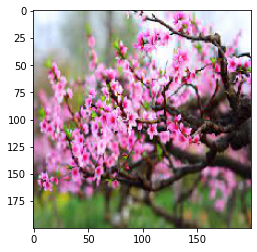

In [16]:
model.evaluate(photos,labels)
model.save('5hoa_Final.h5')
from keras.models import load_model
models=load_model('5hoa_Final.h5')
classes = ["hoahong","hoacuc","hoasen","hoamai","hoadao",]
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('hoa_dao.jfif', target_size=(200,200))
plt.imshow(img)

In [17]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.11236578 0.08715087 0.11509875 0.09931918 0.16607162 0.05375576
  0.06814329 0.03952727 0.10408446 0.04993448 0.1045485 ]]


'hoadao'